The `Boxplots`class offers a simple interface for creating boxplots to compare different models, observational datasets, and variables

In [1]:
from aqua.diagnostics import Boxplots, PlotBoxplots

As an example, we will plot the net long-wave and top net short-wave radiation fluxes at the top of the atmosphere for the IFS-NEMO historical experiment, comparing the results with ERA5 and CERES climatologies.
We start by retrieving the data and computing the fieldmeans of the required variables.

In [3]:
variables  = ['-tnlwrf', 'tnswrf']

boxplots = Boxplots(catalog='climatedt-phase1', model = 'IFS-NEMO', exp ='historical-1990', source = 'lra-r100-monthly')
boxplots.run(var=variables)

boxplots_era5 = Boxplots(model = 'ERA5', exp ='era5', source = 'monthly')
boxplots_era5.run(var=variables)

boxplots_ceres = Boxplots(model = 'CERES', exp ='ebaf-toa421', source = 'monthly',  regrid='r100')
boxplots_ceres.run(var=variables)



2026-01-19 16:47:49 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-01-19 16:47:49 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2026-01-19 16:48:08 :: CoordIdentifier :: WARNING  -> Coordinate 'level' assigned to multiple types with identical scores: [('depth', 50), ('height', 50)]. Disabling data model check for this coordinate.
2026-01-19 16:48:09 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-01-19 16:48:09 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data


The field means of the retrieved variables are stored as attributes of the `Boxplots` class. They can be optionally saved as NetCDF files by setting the `save_netcdf=True` flag during the class initialization.



Let's now produce the boxplot throught `plot_boxplots` method of the class `PlotBoxplots`. 
The method requires in input the list of dataset(s) and reference dataset(s) containing the fldmeans of the variables to plot.


2026-01-19 16:48:14 :: Boxplots :: DEBUG    -> Updating the log_level to DEBUG
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b383755/.aqua
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b383755/.aqua/config-aqua.yaml
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> Catalog found in /home/b/b383755/.aqua/config-aqua.yaml file are ['mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'obs', 'climatedt-o25.1', 'climatedt-phase1', 'ci']
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> Available catalogs are ['mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'obs', 'climatedt-o25.1', 'climatedt-phase1', 'ci']
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> Default catalog will be mn5-phase2
2026-01-19 16:49:32 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b383755/.aqua/catalogs/mn5-phase2/catalog.yaml
2026-01-19 16:49

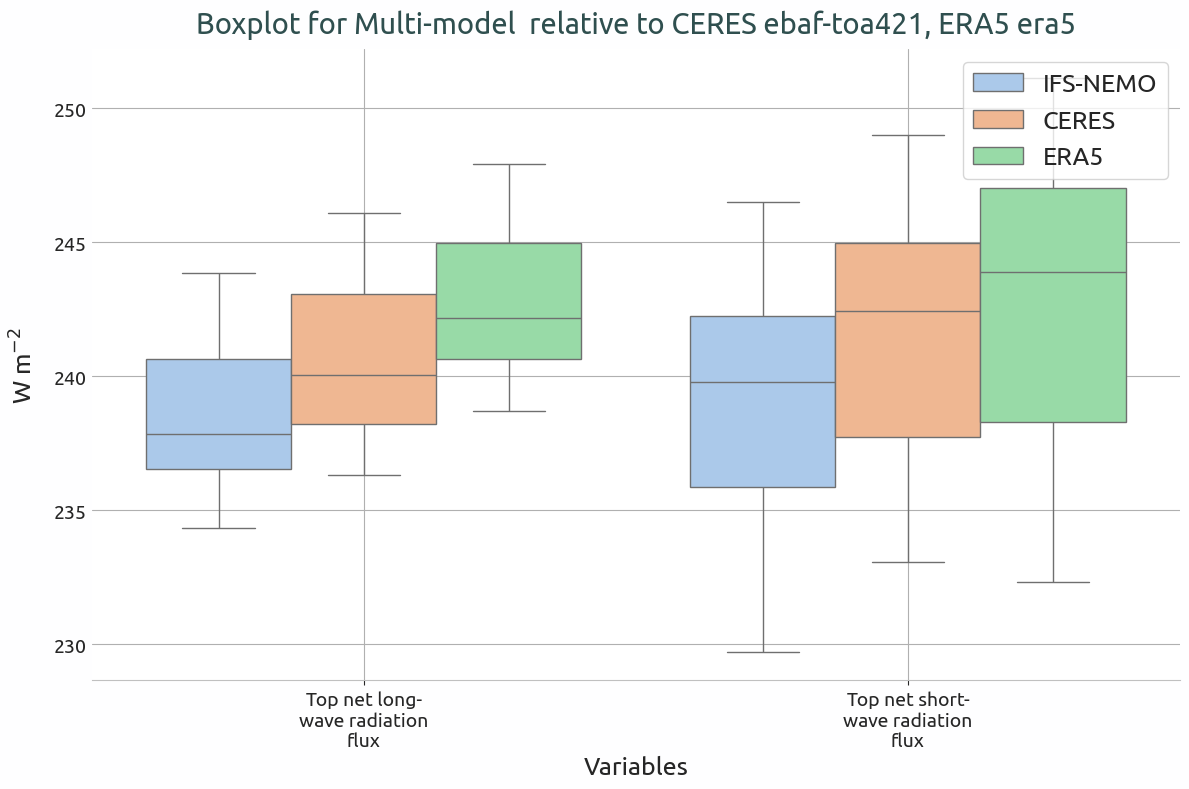

In [4]:
datasets = [boxplots.fldmeans]
datasets_ref = [boxplots_ceres.fldmeans, boxplots_era5.fldmeans]

plot = PlotBoxplots(diagnostic='radiation', save_png=False, save_pdf=False, loglevel='DEBUG')
plot.plot_boxplots(data=datasets, data_ref=datasets_ref, var=variables)

If reference datasets are provided and the ``anomalies`` option is set to ``True``, the boxplot will show anomalies with respect to the mean of the selected reference dataset. 
With the ``add_mean_line`` option set to ``True``, dashed lines indicating the absolute mean values will be added to the boxplots.

2025-09-24 18:18:54 :: Boxplots :: INFO     -> Computing anomalies relative to reference dataset CERES
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'obs', 'climatedt-phase1']
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'obs', 'climatedt-phase1']
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Machine file is /users/caprioli/.aqua/catalogs/ci/machine.yaml
2025-09-24 18:18:54 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-09-24 18:18:54 :: ConfigSt

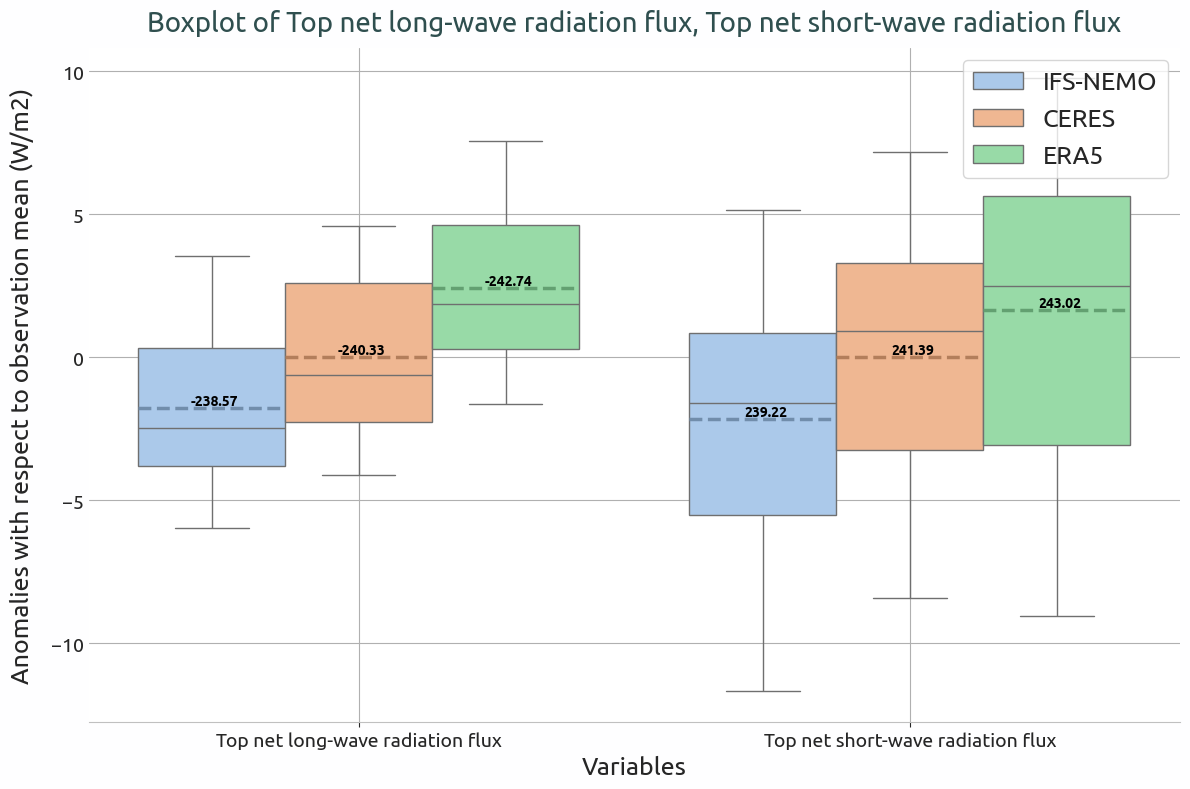

In [4]:
plot.plot_boxplots(data=datasets, data_ref=datasets_ref, var=variables, anomalies=True, add_mean_line=True)
